In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

obs: i added the data manually

In [2]:
import pandas as pd

# Function to convert time strings to seconds
def convert_to_seconds(time_str):
    if 'min' in time_str:
        minutes, seconds = time_str.split('min')
        return int(minutes) * 60 + float(seconds.rstrip('s'))  # Removing 's' and converting to seconds
    else:
        return float(time_str.rstrip('s'))  # Removing 's' and converting to seconds

def process_csv(file_path):
    # Importing the CSV file as a pandas DataFrame
    df = pd.read_csv(file_path)

    # Applying the conversion function to the 'time' column
    df['time'] = df['time'].apply(convert_to_seconds)

    return df

# Path to your CSV file
csv_file_path = 'results.csv'  # Replace with your file path

# Processing the CSV file
processed_df = process_csv(csv_file_path)

processed_df.to_csv('processed_results.csv', index=False)

In [3]:
df = pd.read_csv('processed_results.csv')
df.head()

,filename,cost_tw,cost_chr,cost_chr_w,cost_opt,time,time_first_part
0,ali535.tsp,271728.094051,214335.494367,264572.049348,202339,9358.228,0.310
1,berlin52.tsp,10116.014496,7903.606133,9105.374689,7542,0.887,0.004
2,bier127.tsp,158637.606159,125873.732602,141129.084066,118282,27.142,0.016
3,burma14.tsp,3935.189109,3354.523137,3651.372050,3323,0.008,0.001
4,kroB100.tsp,25881.199894,23352.292155,26758.010769,22141,12.365,0.010


In [4]:
df['relative_error_tw'] = np.abs(df['cost_tw']/df['cost_opt'] - 1)
df['relative_error_chr'] = np.abs(df['cost_chr']/df['cost_opt'] - 1)
df['relative_error_chr_w'] = np.abs(df['cost_chr_w']/df['cost_opt'] - 1)

In [5]:
df['relative_error_tw'].describe()

count    12.000000
mean      0.292326
std       0.101726
min       0.135352
25%       0.180402
50%       0.342113
75%       0.362632
max       0.383648
Name: relative_error_tw, dtype: float64

In [6]:
df['relative_error_chr'].describe()

count    12.000000
mean      0.047246
std       0.028404
min       0.001027
25%       0.031721
50%       0.053499
75%       0.065481
max       0.088981
Name: relative_error_chr, dtype: float64

In [7]:
df['relative_error_chr_w'].describe()

count    12.000000
mean      0.183603
std       0.078826
min       0.047825
25%       0.152766
50%       0.200748
75%       0.213808
max       0.307568
Name: relative_error_chr_w, dtype: float64

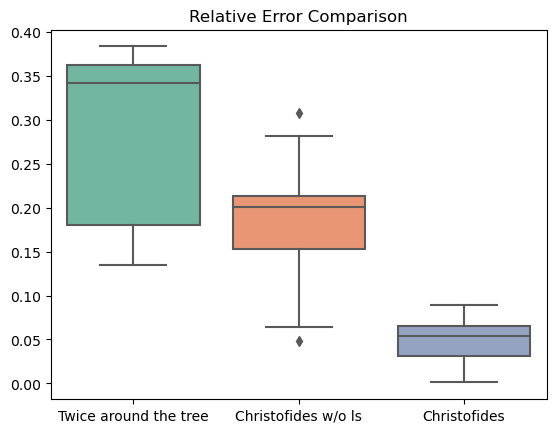

In [9]:
ax = sns.boxplot(data=df[['relative_error_tw', 'relative_error_chr_w', 'relative_error_chr']],
                 palette='Set2')

# Define custom readable names for your x-tick labels
labels = ['Twice around the tree', 'Christofides w/o ls', 'Christofides']

# Set the custom labels
ax.set_xticklabels(labels)

ax.set_title('Relative Error Comparison')

# Show the plot
plt.show()

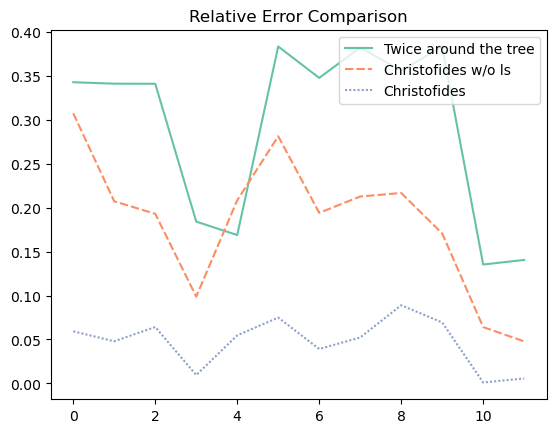

In [10]:
ax = sns.lineplot(data=df[['relative_error_tw', 'relative_error_chr_w', 'relative_error_chr']],
                  palette='Set2')

# Define custom readable names for your legend
labels = ['Twice around the tree', 'Christofides w/o ls', 'Christofides']

# Set the legend with custom labels
ax.legend(labels)

# Add a title to the plot
ax.set_title('Relative Error Comparison')

# Show the plot
plt.show()

In [11]:
# put df in log scale to plot
df_log = df.copy()
df_log['cost_opt'] = np.log(df_log['cost_opt'])
df_log['cost_tw'] = np.log(df_log['cost_tw'])
df_log['cost_chr'] = np.log(df_log['cost_chr'])
df_log['cost_chr_w'] = np.log(df_log['cost_chr_w'])

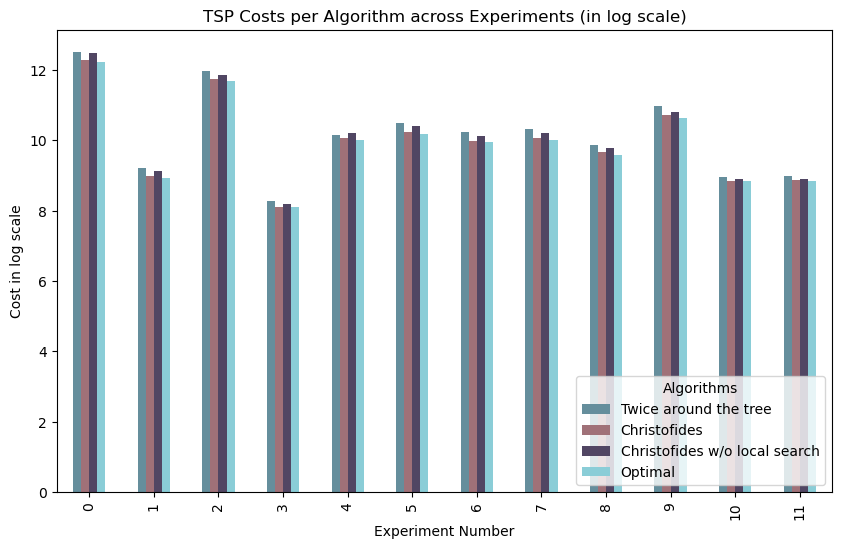

In [12]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots with a specific size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed

# Plotting on the axes object
df_log[['cost_tw', 'cost_chr', 'cost_chr_w', 'cost_opt']].plot(kind='bar', color=['#658E9C', '#A07178', '#514663', '#8ACDD7'], ax=ax)

# Setting labels and title
ax.set_xlabel("Experiment Number")
ax.set_ylabel("Cost in log scale")
ax.set_title("TSP Costs per Algorithm across Experiments (in log scale)")

# Adding legend with custom labels
plt.legend(["Twice around the tree", "Christofides", "Christofides w/o local search", "Optimal"], title="Algorithms", loc='lower right')

# Display the plot
plt.show()


In [14]:
df['time_ls'] = df['time'] - df['time_first_part']
df.head()

,filename,cost_tw,cost_chr,cost_chr_w,cost_opt,time,time_first_part,relative_error_tw,relative_error_chr,relative_error_chr_w,time_ls
0,ali535.tsp,271728.094051,214335.494367,264572.049348,202339,9358.228,0.310,0.342935,0.059289,0.307568,9357.918
1,berlin52.tsp,10116.014496,7903.606133,9105.374689,7542,0.887,0.004,0.341291,0.047946,0.207289,0.883
2,bier127.tsp,158637.606159,125873.732602,141129.084066,118282,27.142,0.016,0.341181,0.064183,0.193158,27.126
3,burma14.tsp,3935.189109,3354.523137,3651.372050,3323,0.008,0.001,0.184228,0.009486,0.098818,0.007
4,kroB100.tsp,25881.199894,23352.292155,26758.010769,22141,12.365,0.010,0.168926,0.054708,0.208528,12.355


In [22]:
df_latex = df.copy()
df_latex['relative_error_chr'] = df_latex['relative_error_chr'].apply(lambda x: f"{x*100:.2f}%")
df_latex['relative_error_chr_w'] = df_latex['relative_error_chr_w'].apply(lambda x: f"{x*100:.2f}%")
df_latex['relative_error_tw'] = df_latex['relative_error_tw'].apply(lambda x: f"{x*100:.2f}%")
df_latex = df_latex[['relative_error_tw', 'relative_error_chr_w', 'relative_error_chr', 'time_first_part', 'time_ls']]
df_latex.head()

,relative_error_tw,relative_error_chr_w,relative_error_chr,time_first_part,time_ls
0,34.29%,30.76%,5.93%,0.310,9357.918
1,34.13%,20.73%,4.79%,0.004,0.883
2,34.12%,19.32%,6.42%,0.016,27.126
3,18.42%,9.88%,0.95%,0.001,0.007
4,16.89%,20.85%,5.47%,0.010,12.355


In [23]:
df_latex.to_latex('results.tex', index=False)

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_21496\178570334.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_latex.to_latex('results.tex', index=False)
